In [1]:
import numpy as np
import plots_lib as _plt
import pandas as pd

std_var_df = pd.read_csv('amazon-books-continuous-standardised.csv', index_col=0)
df = pd.read_csv('amazon-books-factorial.csv', index_col=0)
lambdas = np.array(pd.read_csv('amazon-books-eigenvalues.csv', index_col=0)).reshape((5,))
print(lambdas.shape)
p = lambdas.shape[0]
F = np.array(df[[f'F{idx}' for idx in range(p)]])
eigenvectors = pd.read_csv('amazon-books-eigenvector.csv', index_col=0)

active_var_label = ['npages','height','width','thick','weight']
df.head()
n, p = F.shape[0], F.shape[1] 

print(n, p)


(5,)
311 5


### PCA Variables analysis

#### we find back the correlation with the axis and the variables using the transition relation: $$corr(F_{\alpha}, V_j) = \sqrt{\lambda_\alpha}*u_{\alpha j}$$


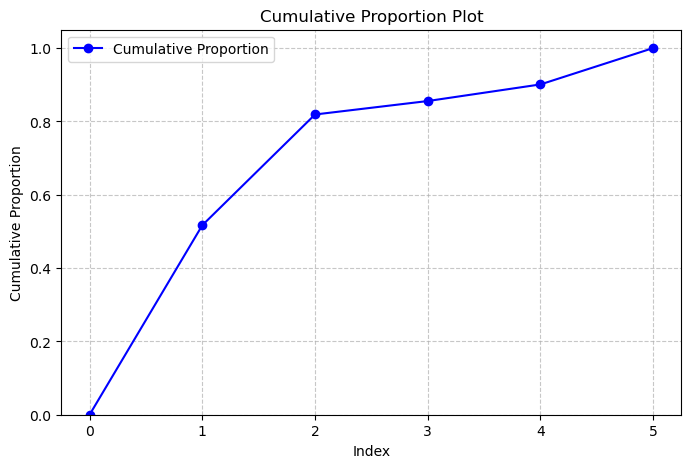

In [2]:
eigenvectors = np.array(eigenvectors)
_plt.plot_cumulative_proportion(lambdas)


In [3]:
from plots_lib import plot_variables
sqrt_lambdas = np.sqrt(lambdas)

var_F_corr = eigenvectors * sqrt_lambdas

contribution = eigenvectors**2


contribution_label = [f'CONTR_{i}' for i in range(len(contribution))]
factorial_axis_label = [f'F{i}' for i in range(len(var_F_corr))]

concat_label = factorial_axis_label + contribution_label
concat = np.concatenate((var_F_corr, contribution), axis=1)
df = pd.DataFrame(concat, index=active_var_label, columns=concat_label)

df.head()

,F0,F1,F2,F3,F4,CONTR_0,CONTR_1,CONTR_2,CONTR_3,CONTR_4
npages,-0.803823,-0.481793,-0.260342,-0.225011,0.010955,0.250860,0.154210,0.370588,0.224099,0.000243
height,-0.502385,0.683011,0.023817,-0.107595,-0.515506,0.097991,0.309917,0.003102,0.051241,0.537751
width,-0.343242,0.798818,-0.003517,-0.133629,0.472218,0.045741,0.423922,0.000068,0.079038,0.451231
thick,-0.851890,-0.393903,0.326900,-0.072315,0.061772,0.281758,0.103079,0.584294,0.023147,0.007721
weight,-0.913024,0.115568,-0.087590,0.375012,0.038848,0.323650,0.008873,0.041948,0.622476,0.003054


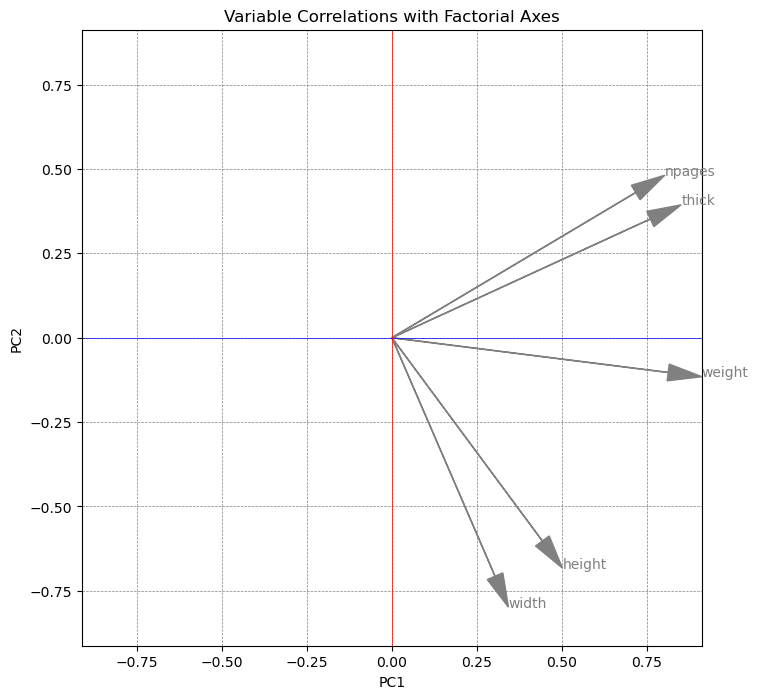

In [4]:
_plt.plot_variables(var_F_corr[:, 0:2] * -1, active_var_label)

##### - It is interesting to note how the first factor is highly correlated with the weight of the books, ***the first factor contain 2.57 of the total variance i.e approximately 51%*** of the total variance
##### - we have the number of page and thickness that goes together and, almost orthogonally the height and widht couple.
##### - the factorial axis, is kind of the bissectrice of thoses variable, trying to get the most variance. the fact that the weights are highly correlated with that factor means that the weight are a good sum of all the criteria.
##### - this feel logical. no matter if a book is thick with a lot of page, or large and tall, it will increase it weights
##### - ***the second axis has 1.51 variance i.e 30%***. it clearly oppose thickness and number of page (positively correlated) to height and with (negatively correlated). 
##### this could explain if the book is heavy more because he is tall and large or because he is thick and with a lot of page

### Let's add the prices as suplmentary variables:

In [5]:
std_var_df.head()

,listPrice,amazonPrice,npages,height,width,thick,weight
0,-0.374988,-0.638617,-0.168322,-0.382130,-0.062467,-0.254507,-0.185870
1,-0.220468,-0.204595,-0.363557,0.309485,-0.062467,-0.536185,-0.790849
2,-1.238039,-0.956785,-1.478287,0.194216,-0.417844,-1.662898,-1.274832
3,-0.145846,-0.146668,2.149308,0.770561,0.529828,1.998919,2.476036
4,0.947855,0.363437,2.451608,-0.151592,-0.417844,1.435563,1.508070


In [6]:
prices = np.array(std_var_df[['listPrice','amazonPrice']])
price_col_names = ['listPrice','amazonPrice']
prices_np = np.array(prices)
corr = np.matmul(prices_np.T, F) *(1/n)

print(corr.shape)
print(var_F_corr.shape)

concat = np.concatenate((var_F_corr, corr), axis=0)
factorial_axis_label = [f'F{i}' for i in range(len(var_F_corr))]
index = active_var_label + ['+' + p for p in price_col_names]
df = pd.DataFrame(concat, columns=factorial_axis_label, index=index)

df


(2, 5)
(5, 5)


,F0,F1,F2,F3,F4
npages,-0.803823,-0.481793,-0.260342,-0.225011,0.010955
height,-0.502385,0.683011,0.023817,-0.107595,-0.515506
width,-0.343242,0.798818,-0.003517,-0.133629,0.472218
thick,-0.851890,-0.393903,0.326900,-0.072315,0.061772
weight,-0.913024,0.115568,-0.087590,0.375012,0.038848
+listPrice,-0.605373,0.502006,-0.076955,-0.017997,0.009779
+amazonPrice,-0.415740,0.502830,-0.090881,-0.021279,0.002212


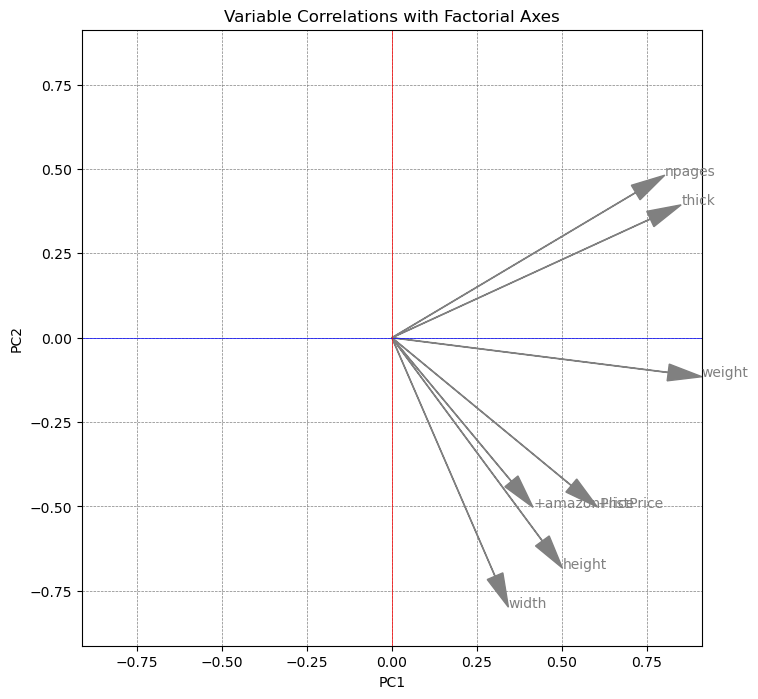

In [7]:
plot_variables(concat[:, 0:2] * -1, index)